In [1]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from astropy.io import fits
from astropy import wcs
from matplotlib import cm
from matplotlib.colors import LogNorm

import warnings
warnings.filterwarnings('ignore')

from sbfTools import *

In [2]:
#https://math.stackexchange.com/questions/1114879/detect-if-two-ellipses-intersect

## Object Initialization

In [3]:
inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'

In [4]:
# obj = ellOBJ("n0679")
# obj = ellOBJ("u12517")
# obj = ellOBJ("n0439")


# obj = ellOBJ("n3308", inFolder=inFolder)

# obj = ellOBJ("n7265", inFolder=inFolder)

# obj = ellOBJ("n7426", inFolder=inFolder)

## very bright nearby object
# obj = ellOBJ("n6577", inFolder=inFolder)

# obj = ellOBJ("ic4727", inFolder=inFolder)

# obj = ellOBJ("ic0380", inFolder=inFolder)

## arms, shells
# obj = ellOBJ("n2418", inFolder=inFolder)

## doesn't exist
# obj = ellOBJ("e137008", inFolder=inFolder)

# obj = ellOBJ("u11990", inFolder=inFolder)

# bright nearby object
# obj = ellOBJ("n3268", inFolder=inFolder)

obj = ellOBJ("n7274", inFolder=inFolder)

### Spiral arms, reject
# obj = ellOBJ("n6688", inFolder=inFolder)

## nuclear dust + companion
# obj = ellOBJ("n4825", inFolder=inFolder)


In [5]:
obj.sky_med, obj.x0, obj.y0

(4184.42724609375, 561.941, 560.97)

In [6]:
obj.x_max, obj.y_max

(1022, 1025)

In [7]:
r = min([obj.x0, obj.x_max-obj.x0, obj.y0, obj.y_max-obj.y0])

r, int(obj.r_max)

(460.05899999999997, 460)

Back Median: 4184.43
Back Mean: 4185.36
Back Stdev: 186.13


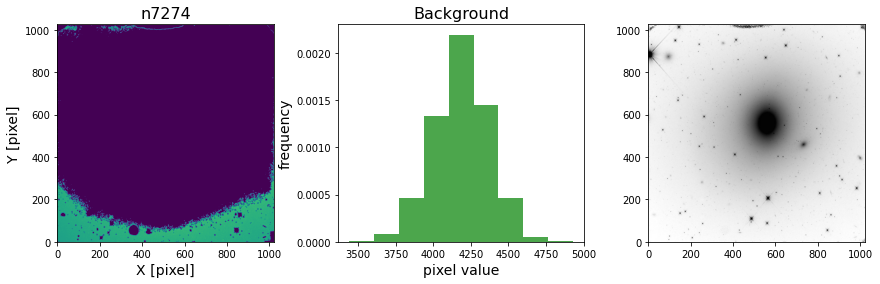

In [33]:
ax1, ax2, ax3 = obj.plot_background()

Text(0.5, 1.0, 'Mask')

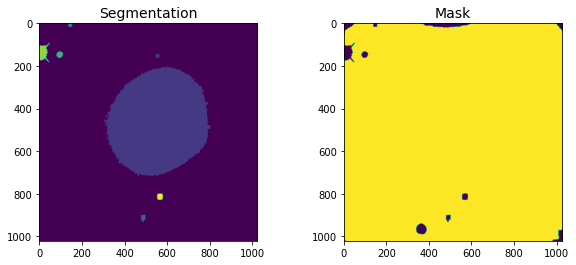

In [34]:
ax1, ax2 = obj.naive_Sextract(minArea=300, thresh=5, mask=0, smooth=3)
ax1.set_title("Segmentation", fontsize=14)

obj.addMasks(maskList=[0], mask=1)
im, h = obj.maskOpen(mask=1)
ax2.imshow(np.flipud(im))
ax2.set_title("Mask", fontsize=14)

N_cross: 0
r0: 3
r1: 201
nr: 13
sky: 3765
CPU times: user 552 ms, sys: 473 ms, total: 1.03 s
Wall time: 755 ms


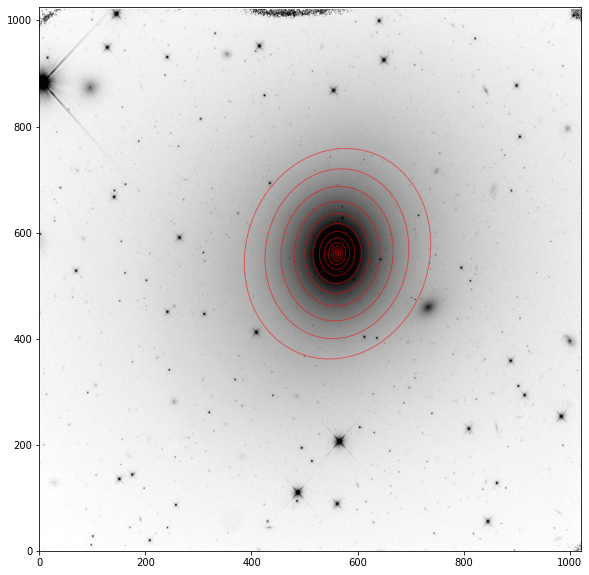

In [35]:
%%time

r0 = 3              # pixel
c_kron = 2      # Kron radius factor
k = 15 
sky_factor = 0.9    # always less than one

r1 = obj.outerR(c_kron)
nr = int(np.round(r1/k))
sky = int(sky_factor*obj.sky_med)

msg = obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="", mask=1)

n_cross = Xellipses(obj.list_ellipses(model=0))
        
ax = obj.tv(options="log")
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

print("N_cross: %d"%n_cross)
print("r0: %d"%r0)
print("r1: %d"%r1)
print("nr: %d"%nr)
print("sky: %d"%sky)

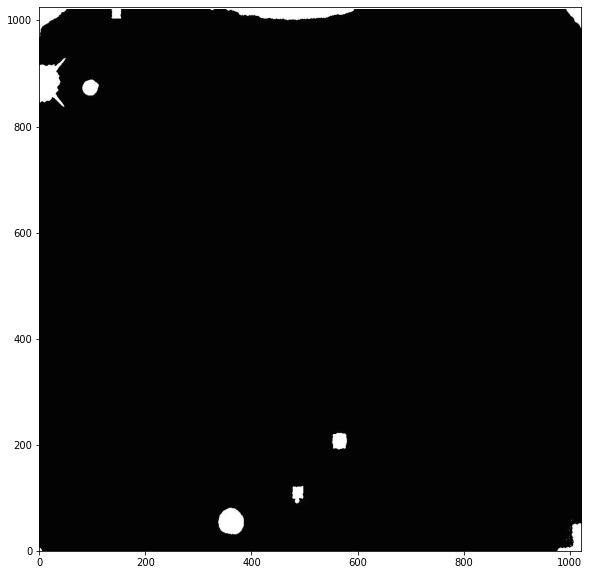

In [36]:
obj.tv_mask(mask=1)

sex Outputs_n7274//tmp -c wfc3j.inpar -CHECKIMAGE_NAME Outputs_n7274//objCheck.000 -CATALOG_NAME  Outputs_n7274//objCatal.000 -DETECT_MINAREA 500 -DETECT_THRESH 5 -WEIGHT_IMAGE  Outputs_n7274//model.000 -CHECKIMAGE_TYPE SEGMENTATION 
Outputs_n7274/obj.000.pro Outputs_n7274/obj.000.log


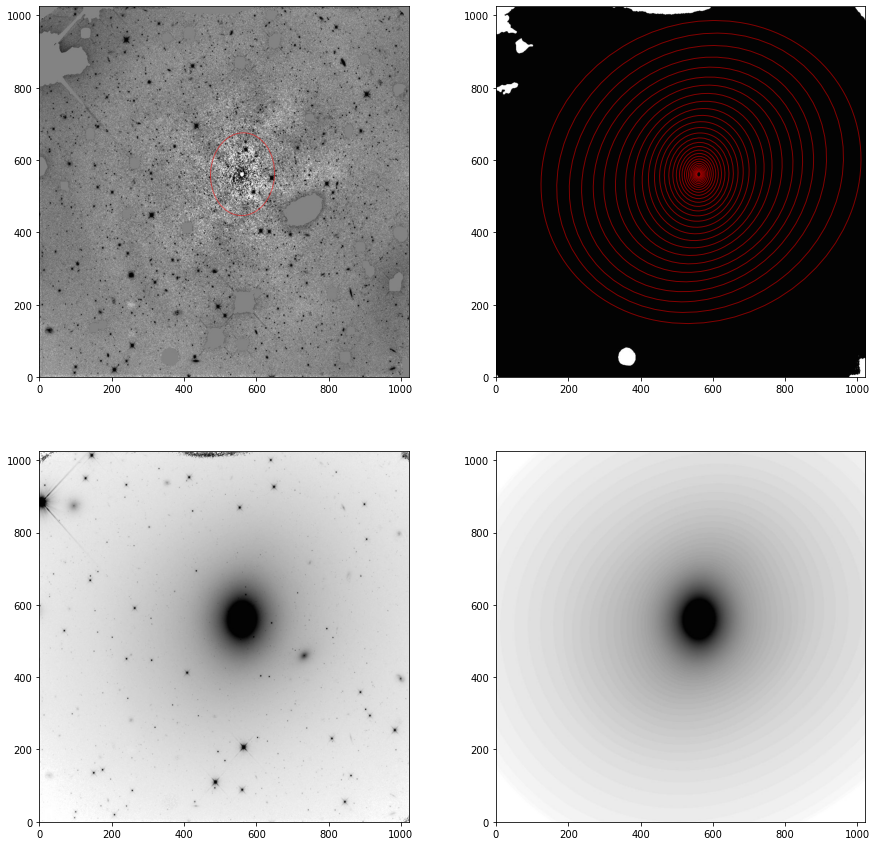

In [39]:
r0 = 7
r1 = obj.outerR(4.5)   # *kron_radius
nr = int(np.round(r1/15))
sky_factor = 0.85    # always less than one
   
# using common mask --> model 0 
obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med*sky_factor, niter=10, mask=1, model_mask=0)

# using residuals of model 0 --> mask 0
obj.objSEextract(model=0, smooth=4, minArea=500, thresh=5, mask=2) 

# plotting model 0

fig, ax = plt.subplots(2, 2, figsize=(15,15))

obj.tv_resid(model=0, ax = ax[0][0], options='sqrt')
Ell = ((obj.x0, obj.y0), 1.*obj.a, 1.*obj.b, obj.angle)
e = patches.Ellipse(Ell[0], width=2*Ell[1], height=2*Ell[2], angle=Ell[3], 
                    alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')
ax[0][0].add_patch(e)

obj.tv_mask(mask=2, ax = ax[0][1])
obj.plot_ellipse(model=0, ax=ax[0][1], alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')


obj.tv(ax = ax[1][0], options='sqrt')
obj.tv_model(model=0, ax=ax[1,1], options='sqrt')



In [38]:
obj.addMasks(maskList=[1,2], mask=1)

'Outputs_n7274//mask.001'

(0.0, 1025.0)

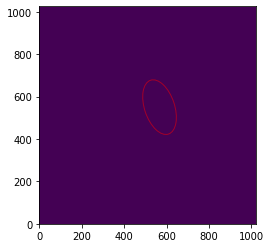

In [169]:
# plt.figure(figsize=(4,4))
# plt.subplot(111)
# ax = plt.gca()
    

# inFits = '../wfc3-16262/n4825/n4825j.fits'

# im, header = imOpen(inFits)

# ## center, Smajor, Smainor, angle
# Ell = make_Ellipse((obj.x0, obj.y0), 0.75*obj.a, 0.75*obj.b, obj.angle)

# e = patches.Ellipse(Ell[0], width=2*Ell[1], height=2*Ell[2], angle=Ell[3], 
#                     alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

# p = im*0
# for 

# # ax = obj.tv(options="log", ax=ax)
# ax.add_patch(e)

# ax.imshow(p)
# ax.set_xlim([0, obj.x_max])
# ax.set_ylim([0, obj.y_max])

In [ ]:
def ellipse_polyline(ellipses, n=10000):
    t = np.linspace(0, 2*np.pi, n, endpoint=False)
    st = np.sin(t)
    ct = np.cos(t)
    result = []
    for x0, y0, a, b, angle in ellipses:
        angle = np.deg2rad(angle)
        sa = np.sin(angle)
        ca = np.cos(angle)
        p = np.empty((n, 2))
        p[:, 0] = x0 + a * ca * ct - b * sa * st
        p[:, 1] = y0 + a * sa * ct + b * ca * st
        result.append(p)
    return result

In [217]:
def get_RMS(r0, r1, nr, sky_factor):
    
    sky = int(sky_factor*obj.sky_med)
    n_cross = 0
    
    if obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, mask=1, model_mask=0) != 'OK':
        n_cross+=1
        
#     obj.objSEextract(model=0, smooth=5, minArea=20, thresh=5) 
#     if obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, mask=0, model=1) != 'OK':
#         n_cross+=1
    
    n_cross += Xellipses(obj.list_ellipses(model=0))
    root = obj.objRoot
    suffix = '.%03d'%model

    ellipseFile = root+'/elliprof'+suffix
    df = pd.read_csv(ellipseFile, delimiter=r"\s+", skiprows=7)
    df = df.apply(pd.to_numeric, errors='coerce')
    x = df.Rmaj**0.25
    y = 2.5*np.log10(df.I0)

    maxX = np.max(x)
    minX = np.min(x)
    dx = maxX-minX
    x1 = 0.40*dx+minX
    x2 = maxX-0.20*dx
    x3 = maxX-0.10*dx
    x0 = x[((x<x2) & (x>x1))]
    y0 = y[((x<x2) & (x>x1))]

    m, b = np.polyfit(x0, y0, 1)

    x_data = x[((x>=x3))]
    y_data = y[((x>=x3))]
    y_model = m*x_data+b

    rms = np.sqrt(np.mean((y_data.values-y_model.values)**2))
    
    return rms, n_cross

In [218]:
from scipy import optimize
from scipy.optimize import minimize

def f(sky_factor):
    
    r0 = 7
    r1 = int(4.0*np.sqrt(obj.a*obj.b))
    nr = int(np.round(r1/15))
    rms, n_cross = get_RMS(r0, r1, nr, sky_factor)
   
   
    sig = rms 
    
    if sig>10 or np.isnan(sig) or n_cross>0:
        sig = 10
    
    return -sig


In [219]:
from bayes_opt import BayesianOptimization
### https://github.com/fmfn/BayesianOptimization

# Bounded region of parameter space
pbounds = {'sky_factor': (0.65, 1.05)}

optimizer = BayesianOptimization(
    f=f,
    pbounds=pbounds,
    random_state=1,
)

In [220]:
%%time

optimizer.maximize(
    init_points=3,
    n_iter=15,
)

|   iter    |  target   | sky_fa... |
-------------------------------------
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  1        | -0.08397  |  0.8168   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  2        | -0.2938   |  0.9381   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  3        | -0.2484   |  0.65     |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  4        | -0.08397  |  0.8168   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  5        | -0.134    |  0.7585   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  6        | -0.8114   |  1.05     |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  7        | -0.1274   |  0.8686   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  8        | -0.08927  |  0.7955   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
|  9        | -0.08499  |  0.8303   |
Outputs_n7426/monsta.001.pro Outputs_n7426/monsta.001.log
| 

In [50]:
print(optimizer.max)

NameError: name 'optimizer' is not defined

In [ ]:
# %%time 

# result = optimize.minimize_scalar(f, bounds=(0.65, 1.1))

# result

In [40]:
# sky_factor = 0.85
# r0 = 7
# r1 = obj.outerR(10)
# nr = int(np.round(r1/10))

for i in range(50):
       
    
    sky = sky_factor*obj.sky_med

    if obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, mask=1, model_mask=0) != 'OK':
        print("Err")
        break


    resid_name = obj.objRoot+"resid.000"
    back_mask = obj.objRoot+"back_mask.fits"

    imarray, header = imOpen(resid_name)
    mskarray, header = imOpen(back_mask)

    masked_image = imarray*mskarray


    a = masked_image
    a = a[(a!=0)]
    std = np.std(a)
    mean = np.mean(a)

    a = a[((a>mean-3.*std)&(a<mean+3.*std))]

    median = np.median(a)
    mean = np.mean(a)
    std = np.std(a)

    sky_factor = median/obj.sky_med + sky_factor

    print(median, sky_factor)

-26.220276 0.8437338435258055
-9.137817 0.8415500757493809
-19.646606 0.8368549035573795
16.476288 0.8407924287843213
-7.99292 0.8388822701289553
-805.1915 0.6464565255848302
126.993774 0.6768056670432255
105.762665 0.7020809696294167
85.82495 0.722591530842303
75.200134 0.7405629591536793
29.480347 0.7476082116926518
74.164734 0.7653321986387632
43.00287 0.7756090815006861
40.832794 0.7853673570753352
50.511597 0.7974386857683698
46.22101 0.8084846439324004
8.954346 0.8106245654022943
25.813904 0.8167936065375396
-13.569641 0.8135507156195654
30.498444 0.8208392743182467
6.0442505 0.8222837373553143
7.0012207 0.8239568984097121
19.479675 0.8286121771724516
10.069794 0.8310186698915142
21.019073 0.836041836086111
-10.212524 0.8336012333910597
12.275909 0.8365349465856882
5.746826 0.8379083307632336
279.35364 0.904668635403754
-27.898315 0.8980014588013334
-56.231384 0.8845632076452554
-30.184769 0.877349611398616
-74.92322 0.8594443609623992
-14.392883 0.8560047305292934
1.1134644 0.85

In [41]:
sky_factor = 0.8562

In [ ]:
# r0 = 7
# r1 = int(5.0*np.sqrt(obj.a*obj.b))
# nr = int(np.round(r1/15))
# sky_factor = 1.1    # always less than one
# sky = int(sky_factor*obj.sky_med)

# rms_f = 1000
# sky_f = 10

# rms_l0 = []
# sky_l0 = []

# for sky_factor in np.arange(0.6, 1.06, 0.025):
#     sky = int(sky_factor*obj.sky_med)
    
#     obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10)
#     n_cross = Xellipses(obj.list_ellipses(model=0))
#     model = 0
#     root = obj.objRoot
#     suffix = '.%03d'%model

#     ellipseFile = root+'/elliprof'+suffix
#     df = pd.read_csv(ellipseFile, delimiter=r"\s+", skiprows=7)
#     df = df.apply(pd.to_numeric, errors='coerce')
#     x = df.Rmaj**0.25
#     y = 2.5*np.log10(df.I0)

#     maxX = np.max(x)
#     minX = np.min(x)
#     dx = maxX-minX
#     x1 = 0.40*dx+minX
#     x2 = maxX-0.20*dx
#     x0 = x[((x<x2) & (x>x1))]
#     y0 = y[((x<x2) & (x>x1))]
#     ax.plot(x0, y0, 'ko', mfc='white')

#     m, b = np.polyfit(x0, y0, 1)

#     x_data = x[((x>=x2))]
#     y_data = y[((x>=x2))]
#     y_model = m*x_data+b

#     rms = np.sqrt(np.mean((y_data.values-y_model.values)**2))
    
#     print(sky_factor, rms, n_cross)

#     if rms < rms_f and n_cross==0:
#         rms_f = rms
#         sky_f = sky_factor
        
#     if n_cross == 0:
#         sky_l0.append(sky_factor)
#         rms_l0.append(rms)
    
    

In [ ]:
# plt.plot(sky_l, rms_l, '.')
# plt.plot(sky_l0, rms_l0, 'r.')

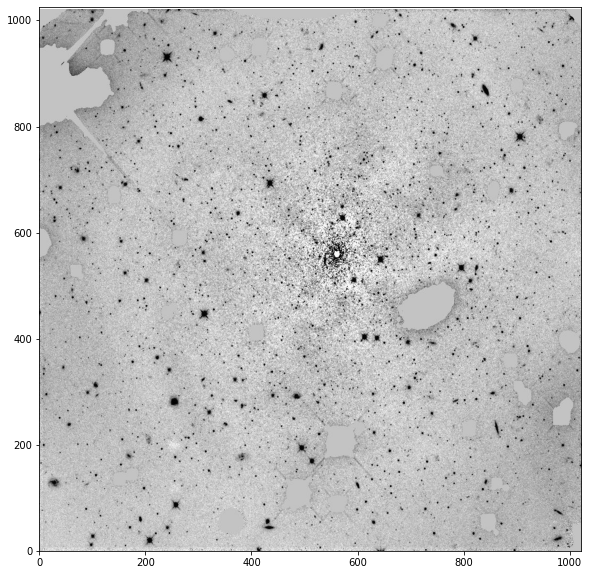

In [42]:
obj.tv_resid(model=0)

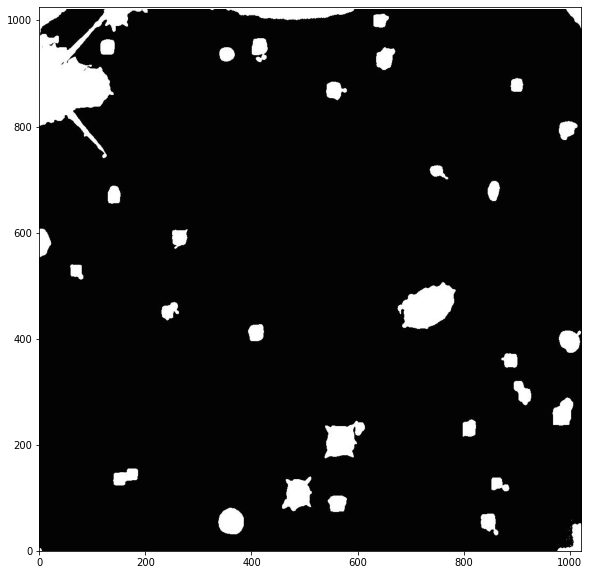

In [20]:
obj.tv_mask(mask=1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fec3c76e880>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec9b910bb0>)

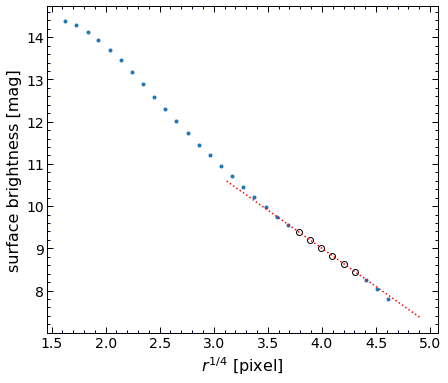

In [43]:
sky = int(sky_factor*obj.sky_med)


# using common mask --> model 0 
obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med*sky_factor, niter=10, mask=1, model_mask=0)


model = 0
root = obj.objRoot
suffix = '.%03d'%model

ellipseFile = root+'/elliprof'+suffix
df = pd.read_csv(ellipseFile, delimiter=r"\s+", skiprows=7)
df = df.apply(pd.to_numeric, errors='coerce')


fig, ax = plt.subplots(1,1, figsize=(7,6))

x = df.Rmaj**0.25
y = 2.5*np.log10(df.I0)
ax.plot(x, y, '.')

ax.set_xlabel(r"$r^{1/4}$"+" [pixel]", fontsize=16)
ax.set_ylabel(r"surface brightness"+" [mag]", fontsize=16)

maxX = np.max(x)
minX = np.min(x)
dx = maxX-minX
x1 = 0.70*dx+minX
x2 = maxX-0.10*dx
x0 = x[((x<x2) & (x>x1))]
y0 = y[((x<x2) & (x>x1))]
ax.plot(x0, y0, 'ko', mfc='white')

m, b = np.polyfit(x0, y0, 1)

xrange = np.linspace(x1-0.2*dx, maxX+0.1*dx, 100)
yrange = m*xrange+b

ax.plot(xrange, yrange, 'r:')


set_axes(ax, fontsize=14)

0

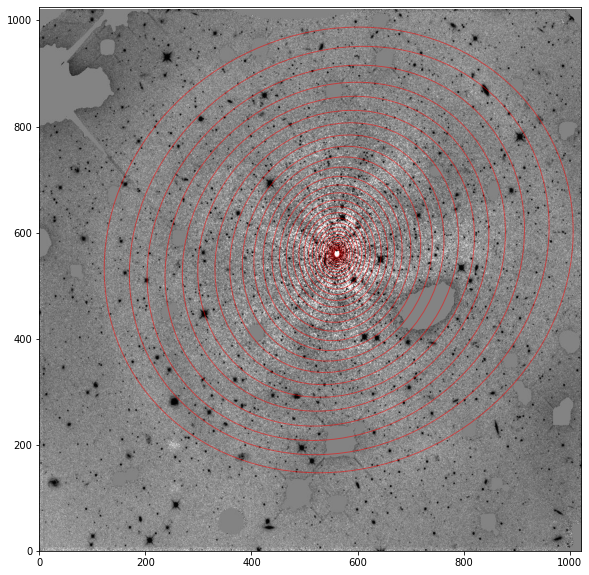

In [44]:
ax = obj.tv_resid(model=0, options='sqrt')
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

Xellipses(obj.list_ellipses(model=0))

Back Median: 2.79
Back Mean: 6.86
Back Stdev: 117.96


0.8568663442519097

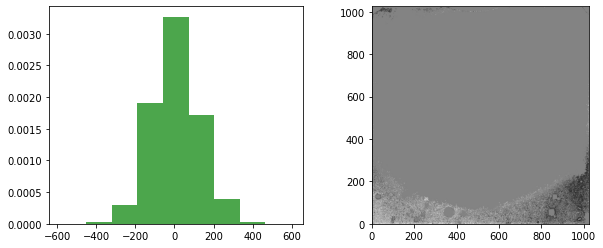

In [45]:
resid_name = obj.objRoot+"resid.000"
back_mask = obj.objRoot+"back_mask.fits"

imarray, header = imOpen(resid_name)
mskarray, header = imOpen(back_mask)

masked_image = imarray*mskarray

fits.writeto('./tmp.fits', np.float32(masked_image), overwrite=True)

## plot_2darray(imarray)
# tv('./tmp.fits', options='log')


a = masked_image
a = a[(a!=0)]
std = np.std(a)
mean = np.mean(a)

a = a[((a>mean-3.*std)&(a<mean+3.*std))]

median = np.median(a)
mean = np.mean(a)
std = np.std(a)

print("Back Median: %.2f"%median)
print("Back Mean: %.2f"%mean)
print("Back Stdev: %.2f"%std)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.hist(a, bins=np.linspace(mean-5*std, mean+5*std, 10), density=True, color='g', alpha=0.7)
tv('./tmp.fits', ax=ax2, options="")

new_factor = median/obj.sky_med + sky_factor

new_factor

In [ ]:
tv(obj.objRoot+"back_mask.fits")

In [ ]:
sky_factor

In [ ]:
%%time

t_indx = 100
indlst = []

for c_kron in np.arange(3, 6, 1):
        for r0 in range(7,11,2):
            for opt in ['', 'COS3X=0','COS3X=1','COS3X=2','COS4X=0','COS4X=1','COS4X=2','COS6X=0','COS6X=-1','COS6X=-2']:
    
                r1 = int(c_kron*np.sqrt(obj.a*obj.b))
                nr = int(np.round(r1/20))
                sky = int(sky_factor*obj.sky_med)


                # generates model 0, using common mask
                if obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options=opt) != 'OK':
                    print("Err1: ", t_indx, r0, r1, nr, sky_factor, c_kron)
                    t_indx+=1
                    continue

                n_cross = Xellipses(obj.list_ellipses(model=0))
                if n_cross>0:
                    print("N_cross 1: ", n_cross, t_indx, r0, r1, nr, k, sky_factor, c_kron, opt)
                    t_indx+=1
                    continue

                # usese residuals of model 0, generates mask t
                obj.objSEextract(model=0, smooth=10, minArea=20, thresh=5, mask=t_indx)

                ## generates model t, uses mask t      
                if obj.elliprof(r0, r1, nr=nr, mask=t_indx, model=t_indx, niter=10, sky=sky, options=opt)  != 'OK':
                    print("Err2: ", t_indx, r0, r1, nr, sky_factor, c_kron, opt)
                    t_indx+=1
                    continue

                n_cross = Xellipses(obj.list_ellipses(model=t_indx))
                if n_cross>0:
                    print("N_cross 2: ", n_cross, t_indx, r0, r1, nr, sky_factor, c_kron, opt)
                    t_indx+=1
                    continue

            #     print(t_indx)
                indlst.append(t_indx)
                t_indx+=1


In [ ]:
print(indlst)

In [ ]:
len(indlst)

In [ ]:
outFolder = 'Outputs_'+obj.name+'/'

In [ ]:
%%time

IM = None
for idx in indlst:
    suffix = '.%03d'%idx
    mask_name = "mask"+suffix
    
    im, header = maksOpen(outFolder+mask_name)
    im = np.abs(im-1)
    
    if IM is None:
        IM = im
    else:
        IM = IM+im

IM /= len(indlst)
IM[IM>=0.99] = 1
IM[IM<0.99] = 0

IM = np.abs(IM-1)      
plt.imshow(IM, cmap=plt.get_cmap('gray'))


In [ ]:
fits.writeto(outFolder+'mask.super.fits', IM, header, overwrite=True)

In [ ]:
name = obj.name
segment = outFolder+'segment.fits'
objCatal = outFolder+'catal.cat'
objname = "{}/{}j.fits".format(name,name)
sex_cmd = """sex """+objname+""" -c wfc3j.inpar -CHECKIMAGE_TYPE SEGMENTATION -CHECKIMAGE_NAME """+segment
sex_cmd += " -CATALOG_NAME  "+objCatal
sex_cmd += " -DETECT_MINAREA 10"
sex_cmd += " -DETECT_THRESH 2"
sex_cmd += " -WEIGHT_TYPE NONE"
xcmd(sex_cmd, True)
#######################################
im, _ = imOpen(segment)
im[im<=1] = 1
im[im>1] = 0
IM_ = IM * im
plt.imshow(IM, cmap=plt.get_cmap('gray'))
fits.writeto(outFolder+'mask.super.fits', np.float32(IM_), header, overwrite=True)

In [ ]:
obj.tv(options='log')

In [ ]:
tv(outFolder+'mask.super.fits')

In [ ]:
print(indlst)

In [ ]:
model = 109 

obj.plot_resid(model=model)

ax = obj.plot_ellipse(model=model, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

Xellipses(obj.list_ellipses(model=model))

In [ ]:
mask_name = "mask.140"
ax = tv('Outputs_'+obj.name+'/'+mask_name)

In [ ]:
r0 = 7
r1 = int(3*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/14))
sky_factor = 0.9    # always less than one
sky = int(sky_factor*obj.sky_med)


# using common mask --> model 0 
obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med, niter=10, options="COS4X=2")

# using residuals of model 0 --> mask 0
obj.objSEextract(model=0, smooth=3, minArea=10, thresh=5) 

obj.elliprof(r0, r1, nr=nr, sky=obj.sky_med, niter=10, options="COS4X=2", mask=0, model=1)

# plotting model 0
# ax = obj.tv_resid(model=0)

ax = obj.tv_mask(mask=0)

ax = obj.plot_ellipse(model=1, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')

In [ ]:
%%time

r0 = 3
r1 = int(3*np.sqrt(obj.a*obj.b))
nr = int(np.round(r1/14))
sky_factor = 0.9    # always less than one
sky = int(sky_factor*obj.sky_med)

print(r1, nr, sky)


# generates model 0, using common mask
obj.elliprof(r0, r1, nr=nr, sky=sky, niter=10, options="COS4X=2") 

# usese residuals of model 0, generates mask 0
obj.objSEextract(model=0, smooth=3, minArea=15, thresh=3)    

## generates model 1, uses mask 0      
obj.elliprof(r0, r1, nr=nr, mask=0, model=1, niter=10, sky=sky, options="COS4X=2")  

ax = obj.tv_resid(model=1)

# ax = obj.tv(options='sqrt cf=jt')
# Ell = make_Ellipse([obj.x0, obj.y0], obj.a, obj.b, obj.angle)
# plot_Ellipse(Ell, ax=ax, edgecolor='r', facecolor='none')

# ax = obj.plot_ellipse(model=1, ax=ax, alpha=0.5, linewidth=1, edgecolor='r', facecolor='none')



ax.set_title(obj.name, fontsize=16)

In [ ]:
mask_name = "mask.000"
ax = tv('Outputs_'+obj.name+'/'+mask_name)

In [ ]:
obj.tv(options="sqt", additions="smooth 1 fw=0")

In [ ]:
ax = tv('Outputs_n0679/mask.000')
# ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=2, edgecolor='r', facecolor='none')

In [ ]:
ax = obj.plot_object(model=0)
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=2, edgecolor='g', facecolor='none')

In [ ]:
ax = obj.plot_resid(model=0)
ax = obj.plot_ellipse(model=0, ax=ax, alpha=0.5, linewidth=2, edgecolor='g', facecolor='none')

In [ ]:
obj.tv(options="sqrt cf=jt")

In [ ]:
obj.tv_resid(model=0, options="sqrt")

In [ ]:
obj.tv_model(model=0, options="sqrt")

In [ ]:
imarray.shape